In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 


# Data Analysis and Visualisation

In [3]:
data= pd.read_csv("home.csv")

In [4]:
data.head()

,province,housing_type,age,floor,m_2,room_number,price
0,Adalar,Daire,33,3,140,3+1,4800000
1,Adalar,Daire,31,2,138,4+1,8500000
2,Adalar,Daire,36,1,59,1+1,2475000
3,Adalar,Daire,35,3,227,6+1,8500000
4,Adalar,Daire,40,2,150,3+2,5900000


In [5]:
data.tail()

,province,housing_type,age,floor,m_2,room_number,price
29000,Zeytinburnu,Daire,28,4,240,5+1,3100000
29001,Zeytinburnu,Daire,7,2,161,3+1,9500000
29002,Zeytinburnu,Daire,22,1,150,4+1,3250000
29003,Zeytinburnu,Daire,5,2,70,1+1,2000000
29004,Zeytinburnu,Daire,25,1,140,3+1,2450000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29005 entries, 0 to 29004
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   province      29005 non-null  object
 1   housing_type  29005 non-null  object
 2   age           29005 non-null  object
 3   floor         29005 non-null  int64 
 4   m_2           29005 non-null  int64 
 5   room_number   29005 non-null  object
 6   price         29005 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [7]:
data.isnull().sum()

province        0
housing_type    0
age             0
floor           0
m_2             0
room_number     0
price           0
dtype: int64

In [8]:
data.isnull().sum().any()

False

## Apartment Age

In [9]:
data["age"].unique()

array(['33', '31', '36', '35', '40', '44', '30', '27', '20', '39', '38',
       '24', '28', '25', '26', '50', 'Sıfır Bina', '37', '32', '1', '10',
       '41', '16', '21', '17', '4', '12', '8', '2', '7', '5', '6', '3',
       '15', '29', '9', '11', '13', '14', '19', '22', '23', '48', '18',
       '42', '34', '45', '43', '55', '52', '51', '60', '90', '47', '46',
       '56', '201', '510', '70', '110', '96', '100', '62', '150', '123',
       '154', '80', '49', '75', '65', '130', '120', '117', '132', '200',
       '68', '101', '53', '54', '183', '372', '58', '85', '105', '115'],
      dtype=object)

In [10]:
# We've converted the age zero buildings to zero.
data.loc[data["age"]=="Sıfır Bina", 'age'] = 0

In [11]:
len(data[data["age"]=="Sıfır Bina"])

0

In [12]:
data['age'] = data['age'].astype(int)

In [13]:
data["age"].mean()

12.7882778831236

In [14]:
data["age"].value_counts()

0      6398
5      2542
4      2370
30     1459
3      1128
       ... 
154       1
150       1
96        1
510       1
115       1
Name: age, Length: 85, dtype: int64

Text(0.5, 1.0, 'Building Age')

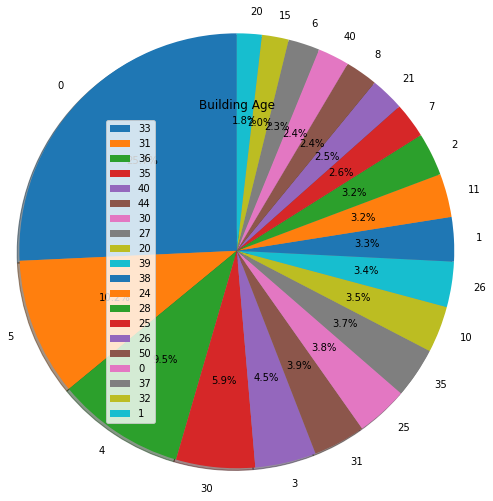

In [15]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

ax.pie(data["age"].value_counts()[:20], labels=data['age'].value_counts().index[:20],autopct='%1.1f%%',shadow=True,radius=2,startangle=90)
ax.legend(data["age"].unique())
ax.set_title("Building Age")

In [16]:
data[data["age"]==0]

,province,housing_type,age,floor,m_2,room_number,price
26,Adalar,Daire,0,3,230,4+1,10000000
76,Arnavutköy,Daire,0,4,160,3+2,2565000
78,Arnavutköy,Daire,0,4,185,4+2,3000000
84,Arnavutköy,Daire,0,3,260,6+2,2950000
85,Arnavutköy,Daire,0,5,185,4+1,2990000
...,...,...,...,...,...,...,...
28982,Zeytinburnu,Daire,0,5,140,3+1,6850000
28984,Zeytinburnu,Daire,0,7,140,3+1,6850000
28985,Zeytinburnu,Daire,0,6,112,2+1,4000000
28986,Zeytinburnu,Daire,0,6,112,2+1,5000000


In [17]:
data[data["age"]==0]["price"].value_counts()[:10]

3000000    109
3500000    109
4500000     97
2500000     92
3250000     82
2850000     78
5500000     76
7500000     75
2250000     72
6500000     71
Name: price, dtype: int64

In [18]:
data[data["age"]==0]["price"].mean()

8899547.500312598

In [19]:
data[data["age"]==0]["price"].max()

8400000000

In [20]:
data[data["age"]==0]["province"].value_counts()

Kadıköy          1013
Beylikdüzü        824
Maltepe           709
Esenyurt          434
Küçükçekmece      376
Bahçelievler      292
Üsküdar           221
Çekmeköy          215
Kartal            209
Sancaktepe        205
Kağıthane         179
Eyüpsultan        177
Bakırköy          165
Büyükçekmece      145
Avcılar           131
Başakşehir        113
Zeytinburnu       102
Ümraniye           91
Beşiktaş           85
Pendik             76
Sultangazi         73
Gaziosmanpasa      61
Sultanbeyli        59
Silivri            58
Tuzla              55
Sarıyer            53
Arnavutköy         51
Şişli              45
Bağcılar           42
Beyoğlu            27
Esenler            23
Bayrampaşa         23
Fatih              22
Ataşehir           16
Güngören           14
Şile                7
Beykoz              6
Adalar              1
Name: province, dtype: int64

In [21]:
data[data["age"]==30]["province"].value_counts()

Kadıköy          358
Fatih            154
Maltepe          146
Şişli            144
Beşiktaş          90
Bahçelievler      80
Güngören          54
Küçükçekmece      49
Üsküdar           45
Bakırköy          45
Zeytinburnu       43
Avcılar           36
Büyükçekmece      30
Sarıyer           28
Kağıthane         23
Beyoğlu           22
Kartal            21
Ataşehir          19
Adalar            11
Esenler           11
Bağcılar           8
Eyüpsultan         7
Beykoz             6
Ümraniye           6
Pendik             5
Bayrampaşa         4
Beylikdüzü         3
Silivri            3
Gaziosmanpasa      2
Esenyurt           2
Tuzla              2
Arnavutköy         1
Şile               1
Name: province, dtype: int64

In [22]:
data[data["age"]>30]["province"].value_counts()

Kadıköy          797
Fatih            429
Beşiktaş         398
Şişli            365
Beyoğlu          300
Bahçelievler     238
Bakırköy         228
Üsküdar          179
Maltepe          133
Güngören          88
Sarıyer           57
Küçükçekmece      52
Adalar            42
Kartal            32
Büyükçekmece      24
Pendik            22
Kağıthane         20
Avcılar           20
Zeytinburnu       18
Ataşehir          17
Eyüpsultan        13
Gaziosmanpasa     10
Esenler            7
Bağcılar           7
Silivri            5
Bayrampaşa         5
Beykoz             4
Ümraniye           4
Beylikdüzü         3
Şile               2
Name: province, dtype: int64

In [23]:
data[data["age"]<13]["province"].value_counts()

Kadıköy          2988
Esenyurt         1639
Beylikdüzü       1617
Maltepe          1603
Küçükçekmece      966
Kağıthane         767
Eyüpsultan        663
Sarıyer           564
Bahçelievler      544
Sancaktepe        532
Çekmeköy          531
Kartal            531
Başakşehir        478
Üsküdar           406
Bakırköy          397
Büyükçekmece      389
Ümraniye          361
Şişli             325
Avcılar           306
Pendik            300
Ataşehir          274
Zeytinburnu       268
Beşiktaş          263
Bağcılar          206
Tuzla             182
Gaziosmanpasa     171
Silivri           139
Sultangazi        132
Beyoğlu           116
Sultanbeyli       116
Arnavutköy         93
Bayrampaşa         63
Esenler            58
Fatih              49
Güngören           46
Beykoz             38
Şile               21
Çatalca             5
Adalar              5
Name: province, dtype: int64

## Number of Rooms

In [24]:
data["room_number"].unique()


array(['3+1', '4+1', '1+1', '6+1', '3+2', '2+1', '4+2', '6+3', '5+2',
       '7+3', '6+2', '5+3', 'Stüdyo', '2+2', '5+1', '3+3', '4+3', '7+1',
       '2+11', '7+2', '1+3', '4+0', '1+2', '4+4', '8+2', '9+1', '41+1',
       '2+0', '3+11', '12+5', '3+190', '3+12', '8+1', '9+3', '15+17',
       '14+4', '8+3', '21+1', '2+3', '10+1', '10+0', '6+4', '30+1', '4+5',
       '3+0', '6+80', '12+1', '15+1', '31+1', '10+2', '8+5', '6+12',
       '2+4'], dtype=object)

In [25]:
data["room_number"].value_counts()

3+1       11093
2+1       10127
4+1        2716
1+1        1825
4+2         982
3+2         683
5+2         568
5+1         438
Stüdyo      145
6+2         132
2+2         117
6+1          69
7+2          22
7+1          14
3+3          11
21+1          4
4+4           4
7+3           3
4+3           3
2+11          3
2+3           2
3+0           2
8+3           2
9+3           2
3+12          2
3+11          2
4+0           2
9+1           2
8+2           2
1+2           2
1+3           2
5+3           2
6+3           2
6+12          1
8+5           1
10+2          1
31+1          1
15+1          1
12+1          1
30+1          1
6+80          1
4+5           1
41+1          1
6+4           1
10+0          1
10+1          1
14+4          1
15+17         1
8+1           1
3+190         1
12+5          1
2+0           1
2+4           1
Name: room_number, dtype: int64

Text(0.5, 1.0, 'Room of Number')

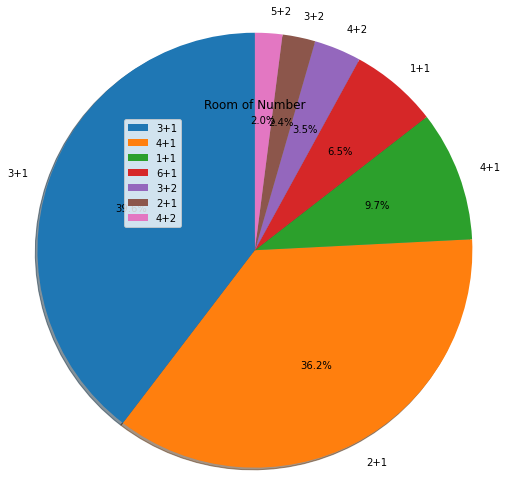

In [26]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

ax.pie(data["room_number"].value_counts()[:7], labels=data["room_number"].value_counts().index[:7],autopct='%1.1f%%',shadow=True, startangle=90,radius=2)
ax.legend(data["room_number"].unique())
ax.set_title("Room of Number")

In [27]:
data[data["room_number"]=="3+1"]["province"].value_counts()

Kadıköy          2837
Maltepe          1085
Beylikdüzü        726
Bahçelievler      477
Esenyurt          422
Beşiktaş          395
Küçükçekmece      370
Kartal            360
Şişli             353
Bakırköy          311
Sarıyer           288
Üsküdar           276
Fatih             238
Büyükçekmece      231
Kağıthane         227
Ataşehir          223
Çekmeköy          215
Ümraniye          210
Başakşehir        207
Sancaktepe        198
Eyüpsultan        187
Pendik            166
Avcılar           157
Zeytinburnu       146
Beyoğlu           118
Güngören          108
Tuzla              85
Gaziosmanpasa      81
Silivri            80
Bağcılar           72
Beykoz             56
Esenler            36
Adalar             34
Sultangazi         31
Sultanbeyli        27
Arnavutköy         24
Bayrampaşa         22
Şile               10
Çatalca             4
Name: province, dtype: int64

In [28]:
data[data["room_number"]=="3+1"]["price"].mean()

7226991.545749572

In [29]:
data[data["room_number"]=="5+1"]["price"].mean()

17706922.37671233

<AxesSubplot:xlabel='room_number'>

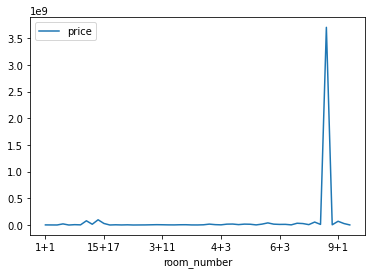

In [30]:
data.pivot_table(index = 'room_number',values = 'price',aggfunc = 'mean').plot(kind='line')

## District

In [31]:
pd.DataFrame(data["province"].unique())

,0
0,Adalar
1,Arnavutköy
2,Ataşehir
3,Avcılar
4,Bağcılar
5,Bahçelievler
6,Bakırköy
7,Başakşehir
8,Bayrampaşa
9,Beşiktaş


In [32]:
len(data["province"].unique())

39

In [33]:
data["province"].value_counts()

Kadıköy          5424
Maltepe          2400
Beylikdüzü       1920
Esenyurt         1752
Küçükçekmece     1320
Şişli            1104
Bahçelievler     1080
Beşiktaş         1008
Kağıthane        1008
Bakırköy          888
Eyüpsultan        816
Sarıyer           816
Kartal            768
Üsküdar           768
Fatih             720
Başakşehir        600
Büyükçekmece      600
Çekmeköy          576
Sancaktepe        552
Zeytinburnu       528
Ümraniye          504
Beyoğlu           504
Avcılar           480
Ataşehir          462
Pendik            432
Bağcılar          273
Gaziosmanpasa     264
Güngören          240
Tuzla             216
Silivri           192
Sultangazi        168
Sultanbeyli       120
Arnavutköy        101
Bayrampaşa         97
Beykoz             96
Esenler            96
Adalar             76
Şile               28
Çatalca             8
Name: province, dtype: int64

<AxesSubplot:>

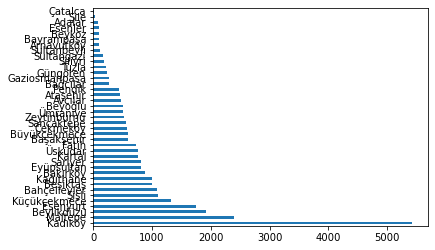

In [34]:
data["province"].value_counts().plot.barh()

<AxesSubplot:xlabel='province'>

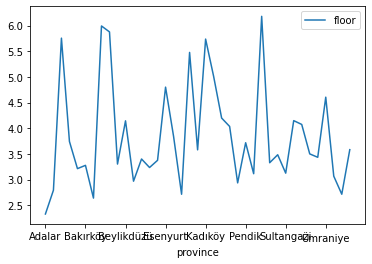

In [35]:
data.pivot_table(index = 'province',values = 'floor',aggfunc = 'mean').plot(kind='line')

<AxesSubplot:xlabel='province'>

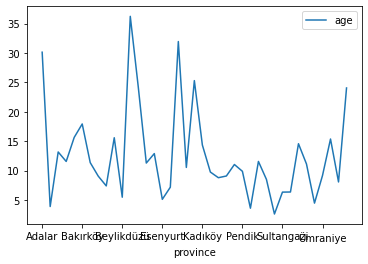

In [36]:
data.pivot_table(index = 'province',values = 'age',aggfunc = 'mean').plot(kind='line')

<AxesSubplot:xlabel='province'>

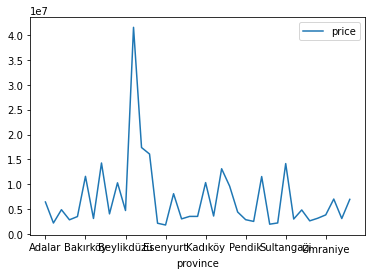

In [37]:
data.pivot_table(index = 'province',values = 'price',aggfunc = 'mean').plot(kind='line')

In [38]:
data[data["province"]=="Kadıköy"]["housing_type"].unique()

array(['Daire'], dtype=object)

## Housing Type

<AxesSubplot:xlabel='housing_type'>

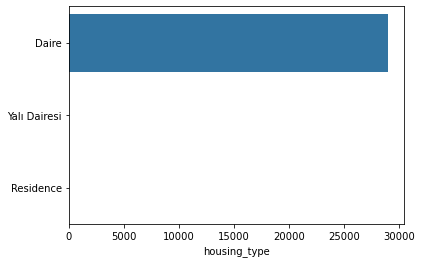

In [39]:
data["housing_type"].value_counts()
sns.barplot(x=data["housing_type"].value_counts(),y=data["housing_type"].unique(),data=data)

Text(0.5, 1.0, 'Housing Type')

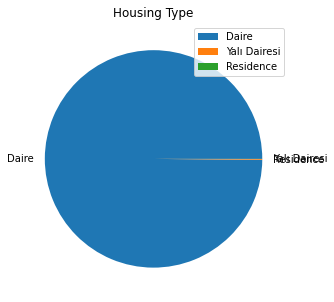

In [40]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

ax.pie(data["housing_type"].value_counts(), labels=data["housing_type"].value_counts().index)
ax.legend(data["housing_type"].unique())
ax.set_title("Housing Type")

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


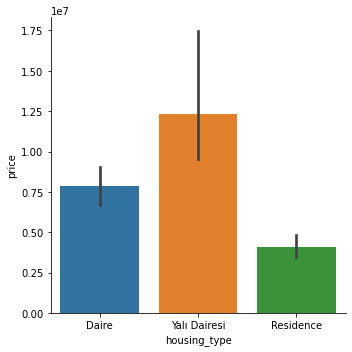

In [41]:
sns.factorplot(x='housing_type',y='price',data=data,kind='bar')

## m2 

In [42]:
data["m_2"].describe()

count    29005.000000
mean       139.680193
std         65.314169
min          2.000000
25%        100.000000
50%        127.000000
75%        160.000000
max       2402.000000
Name: m_2, dtype: float64

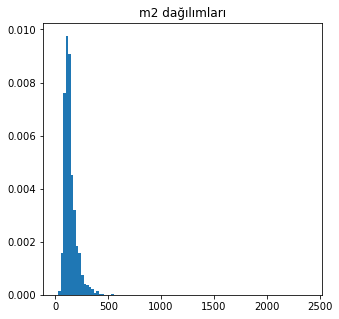

In [43]:
fig = plt.figure(figsize=(5, 5))
plt.hist(data["m_2"],bins=100,density=True)
plt.title("m2 dağılımları")
plt.show()

<AxesSubplot:xlabel='province'>

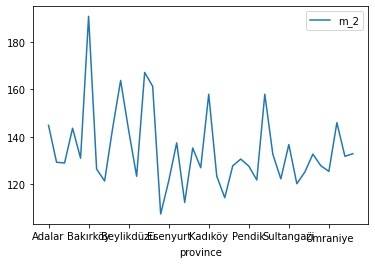

In [44]:
data.pivot_table(index = 'province',values = 'm_2',aggfunc = 'mean').plot(kind='line')

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,29005.0,1.278828e+01,1.423720e+01,0.0,2.0,6.0,25.0,5.100000e+02
floor,29005.0,4.249612e+00,3.381527e+00,1.0,2.0,3.0,5.0,2.000000e+01
m_2,29005.0,1.396802e+02,6.531417e+01,2.0,100.0,127.0,160.0,2.402000e+03
price,29005.0,7.841389e+06,1.099037e+08,1.0,2350000.0,3720000.0,7000000.0,9.250000e+09


# Veri Ön İşleme

## Aykırı Değer Tespiti

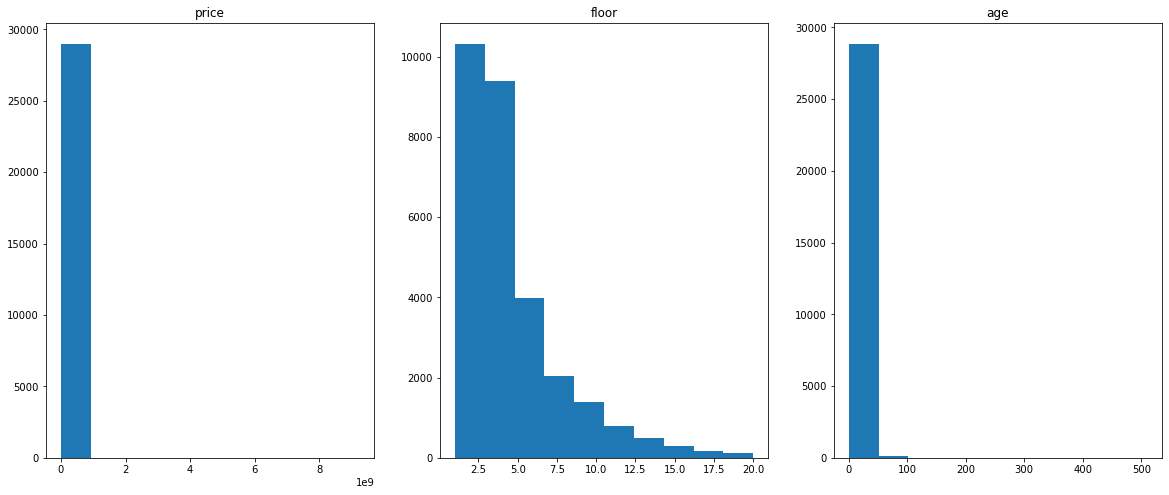

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 8))
 
ax1.hist(data['price'])
ax1.set_title("price")
 
ax2.hist(data['floor'])
ax2.set_title("floor")
 
ax3.hist(data['age'])
ax3.set_title("age")
 
plt.show()

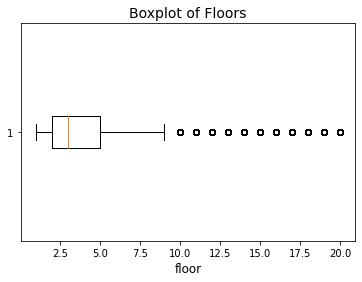

In [47]:
plt.boxplot(data['floor'], vert=False)
plt.xticks(fontsize=10)
plt.xlabel('floor', fontsize=12)
plt.title('Boxplot of Floors', fontsize=14)
plt.show()

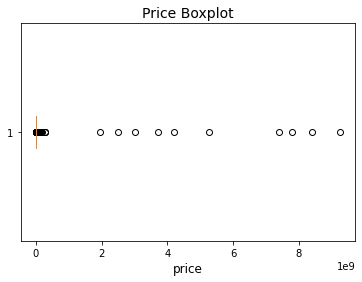

In [48]:
plt.boxplot(data['price'], vert=False)
plt.xticks(fontsize=10)
plt.xlabel('price', fontsize=12)
plt.title('Price Boxplot', fontsize=14)
plt.show()

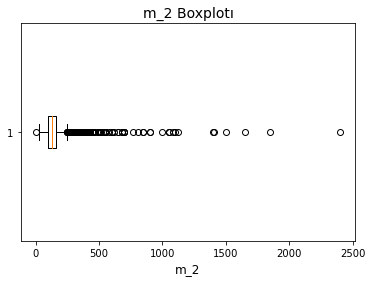

In [49]:
plt.boxplot(data['m_2'], vert=False)
plt.xticks(fontsize=10)
plt.xlabel('m_2', fontsize=12)
plt.title('m_2 Boxplotı', fontsize=14)
plt.show()

### Z-score method

In [50]:
z_score = (data['price'] - data['price'].mean()) / data['price'].std()

# Z-puanını kullanarak aykırı değerlerin tespit edilmesi
outliers = data[np.abs(z_score) > 3]
outliers

,province,housing_type,age,floor,m_2,room_number,price
1234,Bağcılar,Daire,17,2,135,3+1,3000000000
5607,Beylikdüzü,Daire,12,4,160,3+1,3700000000
7107,Beyoğlu,Daire,3,4,85,2+1,9250000000
7405,Beyoğlu,Daire,40,1,100,3+1,7780000000
8066,Büyükçekmece,Daire,0,4,600,8+3,7400000000
10830,Eyüpsultan,Daire,5,3,91,2+1,2500000000
18410,Kağıthane,Daire,6,4,180,4+1,5250000000
18835,Kağıthane,Daire,0,9,80,2+1,4200000000
20996,Küçükçekmece,Daire,0,11,160,4+1,8400000000
25725,Sultangazi,Daire,12,1,115,2+1,1949000000


In [51]:
z_score = (data['floor'] - data['floor'].mean()) / data['floor'].std()

# Z-puanını kullanarak aykırı değerlerin tespit edilmesi
outliers = data[np.abs(z_score) > 3]
outliers

,province,housing_type,age,floor,m_2,room_number,price
177,Ataşehir,Daire,6,20,145,3+1,18000000
188,Ataşehir,Daire,21,18,70,1+1,4000000
195,Ataşehir,Daire,4,16,130,2+1,4000000
199,Ataşehir,Daire,5,17,125,3+1,5850000
201,Ataşehir,Daire,11,18,72,1+1,3700000
...,...,...,...,...,...,...,...
28262,Üsküdar,Daire,1,20,170,2+1,24000000
28429,Üsküdar,Daire,4,20,78,1+1,15500000
28544,Zeytinburnu,Daire,0,16,253,4+1,43000000
28703,Zeytinburnu,Daire,1,16,214,3+1,22750000


### Inter Quantile Range Method

In [52]:
def iqr(df,var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_t = q1 - (1.5 * diff)
    upper_t = q3 + (1.5 * diff)
    return df[(df[var] < lower_t) | (df[var] > upper_t)]
outliersfiyat=iqr(data,"price")
outliersm2=iqr(data,"m_2")
outliersfiyat

,province,housing_type,age,floor,m_2,room_number,price
56,Adalar,Daire,16,5,140,3+1,14500000
58,Adalar,Daire,40,4,279,5+2,14000000
73,Adalar,Yalı Dairesi,27,3,170,4+1,19950000
177,Ataşehir,Daire,6,20,145,3+1,18000000
196,Ataşehir,Daire,13,3,248,3+1,19500000
...,...,...,...,...,...,...,...
28930,Zeytinburnu,Daire,2,6,160,4+1,35500000
28954,Zeytinburnu,Daire,1,14,334,5+1,46000000
28969,Zeytinburnu,Daire,0,1,126,2+1,14800000
28979,Zeytinburnu,Daire,8,5,212,4+1,14500000


### Mean Absolute Deviation Method

In [53]:
# Ortalama değeri hesaplama
mean = data['price'].mean()

# Her bir verinin ortalamadan farkının mutlak değeri
abs_deviations = np.abs(data['price'] - mean)

# Ortalama Mutlak Sapma
MAD = abs_deviations.mean()

print("Mean Absolute Deviation : ", MAD)
outliers = data[abs_deviations > 3 * MAD]
outliers

Mean Absolute Deviation :  6928763.105812594


,province,housing_type,age,floor,m_2,room_number,price
636,Ataşehir,Daire,31,2,1080,3+1,35850000
1234,Bağcılar,Daire,17,2,135,3+1,3000000000
2476,Bakırköy,Daire,20,2,380,6+2,48000000
2502,Bakırköy,Daire,17,2,350,5+2,48000000
2558,Bakırköy,Daire,20,2,350,6+2,48000000
...,...,...,...,...,...,...,...
28780,Zeytinburnu,Daire,2,14,330,5+1,39500000
28860,Zeytinburnu,Daire,1,10,260,4+1,29000000
28889,Zeytinburnu,Daire,0,14,318,4+1,47000000
28930,Zeytinburnu,Daire,2,6,160,4+1,35500000


In [54]:
def double_mad(df, var):
    c = 1.4826
    q2 = np.median(df[var])
    bot_val = df.loc[df[var] <= df[var].median(), var]
    bot_mad = (abs(bot_val - q2).median()) * c
    up_val = df.loc[df[var] >= df[var].median(), var]
    up_mad = (abs(up_val - q2).median()) * c
    lower_t = q2 - (3 * bot_mad)
    upper_t = q2 + (3 * up_mad)
    return df[(df[var] < lower_t) | (df[var] > upper_t)]

double_mad(data,"price")

,province,housing_type,age,floor,m_2,room_number,price
73,Adalar,Yalı Dairesi,27,3,170,4+1,19950000
196,Ataşehir,Daire,13,3,248,3+1,19500000
288,Ataşehir,Daire,13,4,320,4+1,24850000
356,Ataşehir,Daire,11,2,350,5+1,23500000
436,Ataşehir,Daire,9,15,360,5+1,21000000
...,...,...,...,...,...,...,...
28884,Zeytinburnu,Daire,1,13,206,3+1,24500000
28889,Zeytinburnu,Daire,0,14,318,4+1,47000000
28930,Zeytinburnu,Daire,2,6,160,4+1,35500000
28954,Zeytinburnu,Daire,1,14,334,5+1,46000000


### Cleaning Outliers 

In [55]:
data.shape

(29005, 7)

In [56]:
data = data[~data.isin(outliersfiyat)].dropna()

In [57]:
data.shape

(26573, 7)

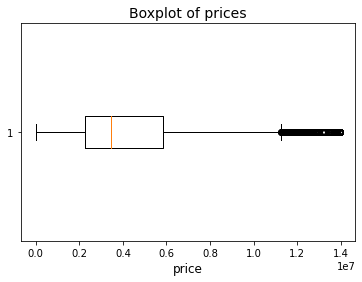

In [58]:
plt.boxplot(data['price'], vert=False)
plt.xticks(fontsize=10)
plt.xlabel('price', fontsize=12)
plt.title('Boxplot of prices', fontsize=14)
plt.show()

In [59]:
data = data[~data.isin(outliersm2)].dropna()

In [60]:
data.shape

(26075, 7)

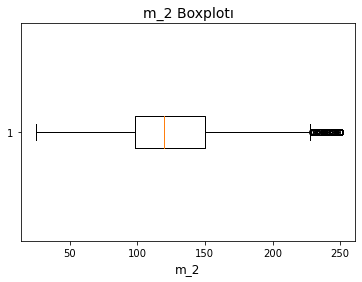

In [61]:
plt.boxplot(data['m_2'], vert=False)
plt.xticks(fontsize=10)
plt.xlabel('m_2', fontsize=12)
plt.title('m_2 Boxplotı', fontsize=14)
plt.show()

In [62]:
outliersyas=iqr(data,"age")
outliersyas

,province,housing_type,age,floor,m_2,room_number,price
4335,Beşiktaş,Daire,90.0,3.0,100.0,2+1,9500000.0
5216,Beylikdüzü,Daire,201.0,6.0,95.0,2+1,2600000.0
5385,Beylikdüzü,Daire,510.0,14.0,155.0,3+1,4190000.0
7083,Beyoğlu,Daire,90.0,5.0,60.0,1+1,8400000.0
7092,Beyoğlu,Daire,70.0,2.0,200.0,3+1,11350000.0
...,...,...,...,...,...,...,...
26276,Şişli,Daire,115.0,1.0,120.0,3+1,6750000.0
26426,Şişli,Daire,65.0,1.0,185.0,3+1,6000000.0
26556,Şişli,Daire,65.0,1.0,185.0,3+1,6000000.0
26791,Şişli,Daire,100.0,3.0,200.0,4+1,9250000.0


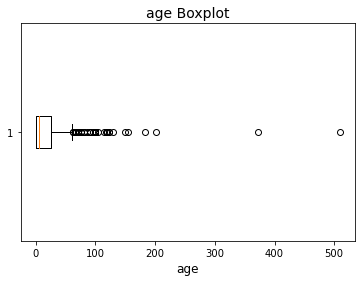

In [63]:
plt.boxplot(data['age'], vert=False)
plt.xticks(fontsize=10)
plt.xlabel('age', fontsize=12)
plt.title('age Boxplot', fontsize=14)
plt.show()

In [64]:
data = data[~data.isin(outliersyas)].dropna()
data.shape

(26009, 7)

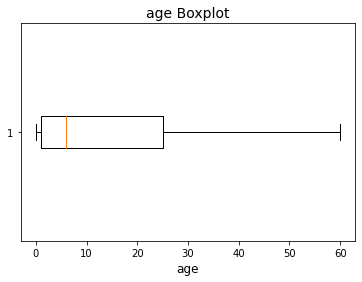

In [65]:
plt.boxplot(data['age'], vert=False)
plt.xticks(fontsize=10)
plt.xlabel('age', fontsize=12)
plt.title('age Boxplot', fontsize=14)
plt.show()

### Quantising Categorical Variables

In [66]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [67]:
df=data.copy()

In [68]:
df["province"] = le.fit_transform(df.province)

In [69]:
le.classes_

array(['Adalar', 'Arnavutköy', 'Ataşehir', 'Avcılar', 'Bahçelievler',
       'Bakırköy', 'Bayrampaşa', 'Bağcılar', 'Başakşehir', 'Beykoz',
       'Beylikdüzü', 'Beyoğlu', 'Beşiktaş', 'Büyükçekmece', 'Esenler',
       'Esenyurt', 'Eyüpsultan', 'Fatih', 'Gaziosmanpasa', 'Güngören',
       'Kadıköy', 'Kartal', 'Kağıthane', 'Küçükçekmece', 'Maltepe',
       'Pendik', 'Sancaktepe', 'Sarıyer', 'Silivri', 'Sultanbeyli',
       'Sultangazi', 'Tuzla', 'Zeytinburnu', 'Çatalca', 'Çekmeköy',
       'Ümraniye', 'Üsküdar', 'Şile', 'Şişli'], dtype=object)

In [70]:
df["province"].unique()

array([ 0,  1,  2,  3,  7,  4,  5,  8,  6, 12,  9, 10, 11, 13, 33, 34, 14,
       15, 16, 17, 18, 19, 20, 22, 21, 23, 24, 25, 26, 27, 28, 29, 30, 37,
       38, 31, 35, 36, 32])

In [71]:
le.inverse_transform([32])

array(['Zeytinburnu'], dtype=object)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26009 entries, 0 to 29004
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   province      26009 non-null  int32  
 1   housing_type  26009 non-null  object 
 2   age           26009 non-null  float64
 3   floor         26009 non-null  float64
 4   m_2           26009 non-null  float64
 5   room_number   26009 non-null  object 
 6   price         26009 non-null  float64
dtypes: float64(4), int32(1), object(2)
memory usage: 1.5+ MB


In [73]:
df["housing_type"] = le.fit_transform(df.housing_type)
df["room_number"] = le.fit_transform(df.room_number)


In [74]:
df

,province,housing_type,age,floor,m_2,room_number,price
0,0,0,33.0,3.0,140.0,13,4800000.0
1,0,0,31.0,2.0,138.0,22,8500000.0
2,0,0,36.0,1.0,59.0,0,2475000.0
3,0,0,35.0,3.0,227.0,30,8500000.0
4,0,0,40.0,2.0,150.0,17,5900000.0
...,...,...,...,...,...,...,...
29000,32,0,28.0,4.0,240.0,27,3100000.0
29001,32,0,7.0,2.0,161.0,13,9500000.0
29002,32,0,22.0,1.0,150.0,22,3250000.0
29003,32,0,5.0,2.0,70.0,0,2000000.0


# Machine Learning

## XGBOOST

In [76]:
#pip install xgboost

In [75]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV ,train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import RobustScaler, StandardScaler


In [76]:
df.reset_index(drop=True, inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26009 entries, 0 to 26008
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   province      26009 non-null  int32  
 1   housing_type  26009 non-null  int32  
 2   age           26009 non-null  float64
 3   floor         26009 non-null  float64
 4   m_2           26009 non-null  float64
 5   room_number   26009 non-null  int32  
 6   price         26009 non-null  float64
dtypes: float64(4), int32(3)
memory usage: 1.1 MB


In [78]:
X= df.drop(["price"] , axis=1)
y=df["price"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [501]:
"""
scaler = RobustScaler()  # RobustScaler #StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

"""

In [ ]:
xgb_model = xgb.XGBRegressor()

parameters = {'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 500, 1000],
              'max_depth': [3, 5, 7]}

xgb_grid = GridSearchCV(xgb_model,
                        parameters,
                        cv=5,
                        n_jobs=-1,
                        verbose=1)

xgb_grid.fit(X_train, y_train)

print("Best hyperparameter values:", xgb_grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [80]:
xgb1=XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=500)

In [81]:
model_xgb=xgb1.fit(X_train,y_train)

In [82]:
predictionxgb=model_xgb.predict(X_test)

In [121]:
y_test[20:50]

20168    2850000.0
21986    1525000.0
3840     9250000.0
20080    2500000.0
5547     3000000.0
17718    6750000.0
20206    3950000.0
8457     1449000.0
6278     2250000.0
20010    3195000.0
5640     1650000.0
14262    7985000.0
2164     2850000.0
18027    2290000.0
19412    1850000.0
25276    3750000.0
644      7100000.0
12237    5950000.0
13821    3995000.0
25164    2550000.0
5608     3000000.0
5126     1130000.0
13096    6850000.0
3131     1450000.0
17959    1795000.0
6518     6150000.0
17743    2070000.0
15232    9500000.0
9703     3050000.0
20554    2850000.0
Name: price, dtype: float64

In [122]:
predictionxgb[20:50]

array([ 3742057.5,  1950164. , 10308695. ,  3094592. ,  3837647.8,
        8759007. ,  3276311.2,  2153353.2,  3239774. ,  3700625.5,
        2803991.5,  7853665. ,  3405049.8,  3424294.5,  3169203.5,
        5360439.5,  1970110.6,  5754992. ,  4246339.5,  2805759.5,
        4138923. ,  2357828.8,  5981157. ,  2224527. ,  1829830.8,
        5070517. ,  2129338.5,  7785325. ,  6286280.5,  2442795.5],
      dtype=float32)

In [123]:
df_temp=pd.DataFrame({'Actual': y_test, 'Predicted': predictionxgb})
df_temp.head(7)

,Actual,Predicted
17151,1550000.0,4.251076e+06
16991,3050000.0,3.206553e+06
19582,2000000.0,4.859064e+06
16646,3190000.0,3.080573e+06
4098,10250000.0,1.175182e+07
15274,11700000.0,1.192807e+07
9138,1900000.0,1.654348e+06


In [124]:
model_xgb.score(X_test,y_test)

0.7584536999500338

In [125]:
model_xgb.score(X_train,y_train)

0.8254966058690846

In [126]:
y_pred = model_xgb.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 969370.7759155133
Mean Squared Error: 1999917573190.8547
Root Mean Squared Error: 1414184.4197949767


In [127]:
R2=r2_score(y_test,y_pred)
print("R²:", R2)

R²: 0.7584536999500338


In [128]:
adj_r2 = 1-(1-R2)*(26009 -1)/(26009 -6-1)
print("Adjusted R²:", adj_r2)

Adjusted R²: 0.7583979627836503


In [129]:
importance=pd.DataFrame({"importance":model_xgb.feature_importances_},index= X_train.columns)
importance

,importance
province,0.385099
housing_type,0.009634
age,0.098670
floor,0.091872
m_2,0.270593
room_number,0.144132


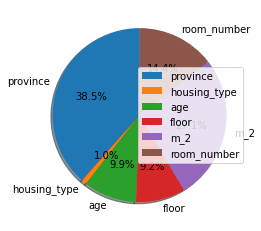

In [130]:
plt.pie(importance["importance"], labels=X_train.columns,autopct='%1.1f%%',shadow=True, startangle=90)
plt.legend(X_train.columns , loc=5)


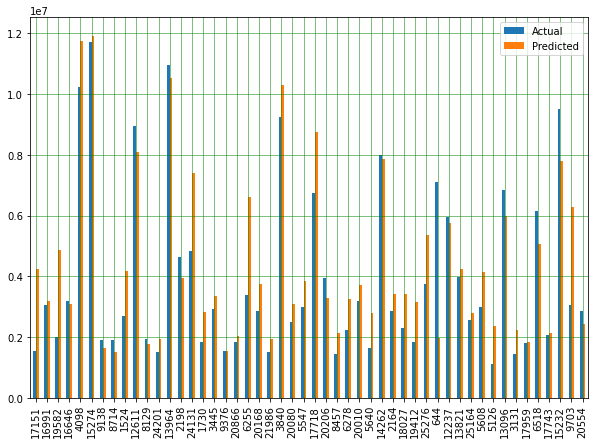

In [131]:
df_temp = df_temp.head(50)
df_temp.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [132]:
df2 = pd.DataFrame({"province": [0],
                    "housing_type": [0],
                    "age": [5],
                    "floor": [2],
                    "m_2": [140],
                    "room_number": [30]})

pred = model_xgb.predict(df2)
pred = int(pred)
print(pred)

5887047


# SVR 

In [133]:
sc=StandardScaler()

scaler = sc.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',degree=3)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [135]:
print(regressor.score(X_test,y_test))
print(regressor.score(X_train,y_train))

-0.11962129972925206
-0.11233164113806304


In [136]:
R2=r2_score(y_test,y_pred)
print("R²:", R2)

adj_r2 = 1-(1-R2)*(26009 -1)/(26009 -6-1)
print("Adjusted R²:", adj_r2)

R²: -0.11962129972925206
Adjusted R²: -0.11987965400193779


In [137]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2138142.1845727297
Mean Squared Error: 9270066700190.088
Root Mean Squared Error: 3044678.423116321


In [138]:
regressor.predict(X_test)[20:30]

array([3349585.14190053, 3350088.77786882, 3351463.01602452,
       3349413.00843971, 3351690.72232199, 3351936.14557013,
       3351131.99118209, 3351285.54722414, 3349626.21784955,
       3349590.88869487])

In [139]:
y_test[20:30]

20168    2850000.0
21986    1525000.0
3840     9250000.0
20080    2500000.0
5547     3000000.0
17718    6750000.0
20206    3950000.0
8457     1449000.0
6278     2250000.0
20010    3195000.0
Name: price, dtype: float64

In [140]:
df_temp=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head(7)

,Actual,Predicted
17151,1550000.0,3.351849e+06
16991,3050000.0,3.349991e+06
19582,2000000.0,3.350864e+06
16646,3190000.0,3.351158e+06
4098,10250000.0,3.352184e+06
15274,11700000.0,3.352248e+06
9138,1900000.0,3.350626e+06


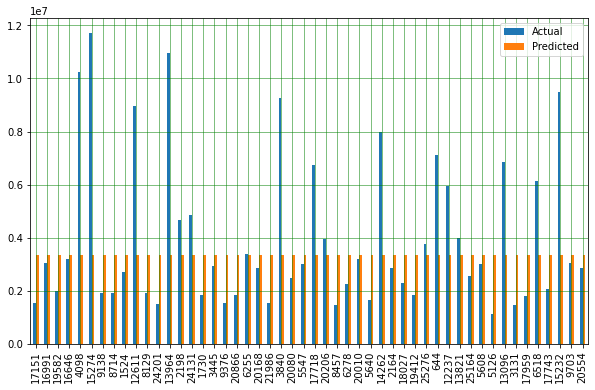

In [141]:
df_temp = df_temp.head(50)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression
lregressor = LinearRegression()
lregressor.fit(X_train, y_train)
y_predl = lregressor.predict(X_test)

In [143]:
print(lregressor.score(X_test,y_test))
print(lregressor.score(X_train,y_train))

0.2563391910173972
0.25733791493198843


In [144]:
y_predl = lregressor.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predl))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predl))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predl)))

Mean Absolute Error: 1889684.404042415
Mean Squared Error: 6157247368599.643
Root Mean Squared Error: 2481380.133836741


In [145]:
R2=r2_score(y_test,y_predl)
print("R²:", R2)

adj_r2 = 1-(1-R2)*(26009 -1)/(26009 -6-1)
print("Adjusted R²:", adj_r2)

R²: 0.2563391910173972
Adjusted R²: 0.2561675901846192


In [146]:
lregressor.predict(X_test)[20:30]

array([2819881.61880717, 3473674.02546084, 5121101.66867132,
       2698799.74482685, 5490984.56897634, 8094383.7069188 ,
       4473772.3423815 , 5566464.85070921, 2651396.66465702,
       2990873.74641036])

In [147]:
y_test[20:30]

20168    2850000.0
21986    1525000.0
3840     9250000.0
20080    2500000.0
5547     3000000.0
17718    6750000.0
20206    3950000.0
8457     1449000.0
6278     2250000.0
20010    3195000.0
Name: price, dtype: float64

In [148]:
df_temp=pd.DataFrame({'Actual': y_test, 'Predicted': y_predl})
df_temp.head(7)

,Actual,Predicted
17151,1550000.0,5.660527e+06
16991,3050000.0,3.516457e+06
19582,2000000.0,4.004240e+06
16646,3190000.0,2.260590e+06
4098,10250000.0,6.850613e+06
15274,11700000.0,5.676223e+06
9138,1900000.0,3.815610e+06


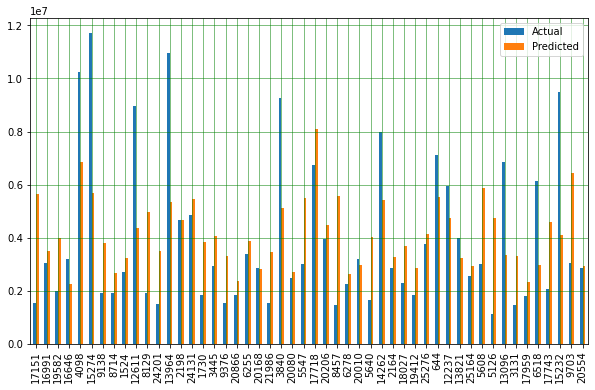

In [149]:
df_temp = df_temp.head(50)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# MLPRegressor 

In [208]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

In [209]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 1000,activation = 'relu',
                       solver = 'adam',learning_rate="adaptive",learning_rate_init=0.05,)

mlp_reg.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), learning_rate='adaptive',
             learning_rate_init=0.05, max_iter=1000)

In [210]:
mlp_prediction=mlp_reg.predict(X_test)

In [211]:
print(mlp_reg.score(X_test,y_test))
print(mlp_reg.score(X_train,y_train))

0.6962841618527499
0.7939267913692066


In [212]:
print('Mean Absolute Error:', mean_absolute_error(y_test, mlp_prediction))  
print('Mean Squared Error:', mean_squared_error(y_test, mlp_prediction))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, mlp_prediction)))

Mean Absolute Error: 1061753.4232063117
Mean Squared Error: 2514659267566.618
Root Mean Squared Error: 1585767.721820134


In [213]:
R2=r2_score(y_test,mlp_prediction)
print("R²:", R2)

adj_r2 = 1-(1-R2)*(26009 -1)/(26009 -6-1)
print("Adjusted R²:", adj_r2)

R²: 0.6962841618527499
Adjusted R²: 0.6962140789733989


In [214]:
df_temp=pd.DataFrame({'Actual': y_test, 'Predicted': mlp_prediction})
df_temp.head(7)

,Actual,Predicted
17151,1550000.0,4.331224e+06
16991,3050000.0,3.009468e+06
19582,2000000.0,4.260478e+06
16646,3190000.0,3.579626e+06
4098,10250000.0,1.180630e+07
15274,11700000.0,1.190226e+07
9138,1900000.0,2.113193e+06


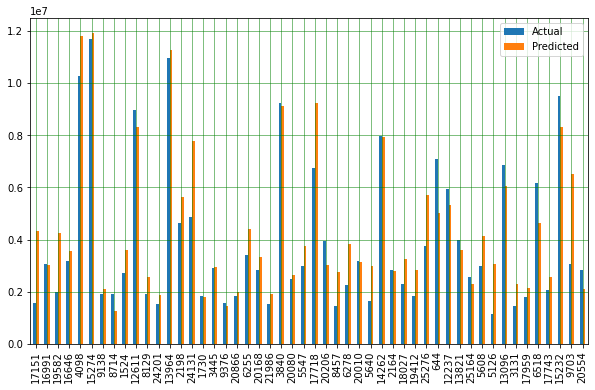

In [215]:
df_temp = df_temp.head(50)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# COMPARISON OF MODELS

In [216]:
df_temp=pd.DataFrame({'Actual': y_test,'Linear Regression Predicted': y_predl,'SVR Predicted': y_pred,'XGBOOST Predicted': predictionxgb,
                      'MLPRegressor Predicted': mlp_prediction})
df_temp.head(7)

,Actual,Linear Regression Predicted,SVR Predicted,XGBOOST Predicted,MLPRegressor Predicted
17151,1550000.0,5.660527e+06,3.351849e+06,4.251076e+06,4.331224e+06
16991,3050000.0,3.516457e+06,3.349991e+06,3.206553e+06,3.009468e+06
19582,2000000.0,4.004240e+06,3.350864e+06,4.859064e+06,4.260478e+06
16646,3190000.0,2.260590e+06,3.351158e+06,3.080573e+06,3.579626e+06
4098,10250000.0,6.850613e+06,3.352184e+06,1.175182e+07,1.180630e+07
15274,11700000.0,5.676223e+06,3.352248e+06,1.192807e+07,1.190226e+07
9138,1900000.0,3.815610e+06,3.350626e+06,1.654348e+06,2.113193e+06


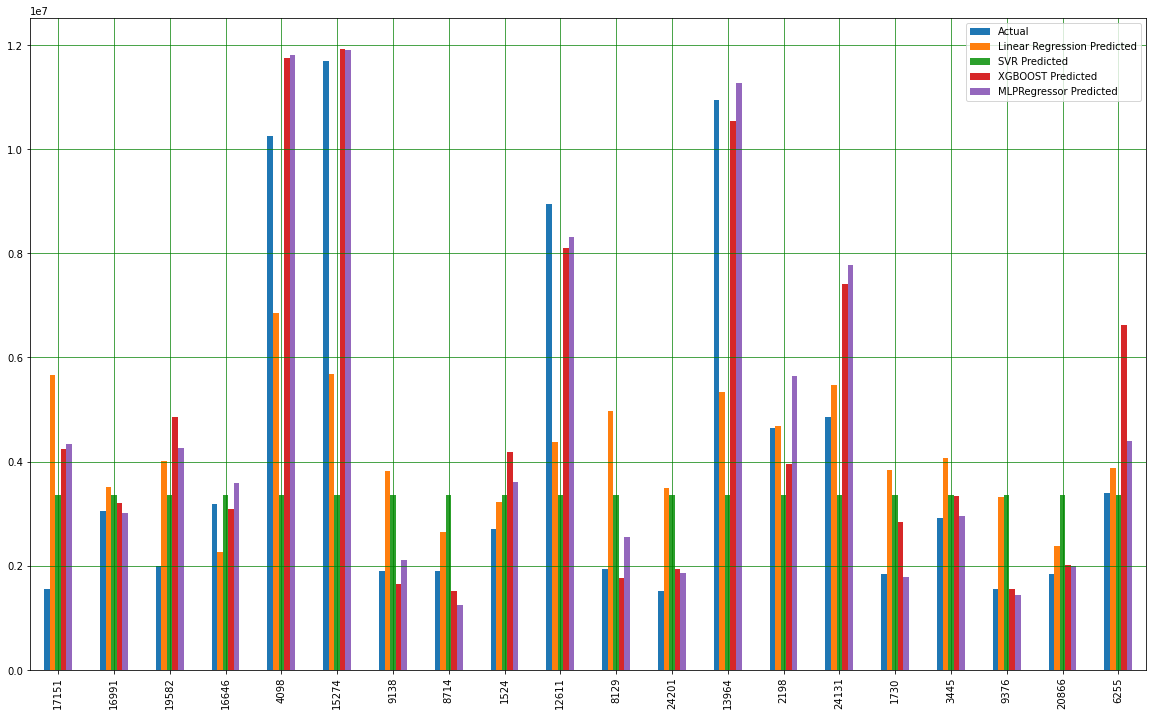

In [222]:
df_temp = df_temp.head(20)
df_temp.plot(kind='bar',figsize=(20,12))
plt.grid(which='major', linestyle='-', linewidth='0.7', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()